# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [54]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,accuracy_score, classification_report, mean_absolute_error, mean_squared_error

from IPython.display import display

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Handling missing values properly first 
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
numeric_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
categorical_columns =  ["HomePlanet", "CryoSleep", "Destination", "VIP"]

#fill numerical columns 
for col in numeric_columns:
    spaceship[col] = spaceship[col].fillna(spaceship[col].median())

for col in categorical_columns: 
    spaceship[col] = spaceship[col].fillna(spaceship[col].mode()[0])

/var/folders/rx/4vz0nngn7_q84td2symm90y40000gn/T/ipykernel_8945/2805910900.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spaceship[col] = spaceship[col].fillna(spaceship[col].mode()[0])


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [11]:
# Feature Engineering 
# one-hot encoding for categorical variables
spaceship_processed = pd.get_dummies(
    spaceship, columns=["HomePlanet", "Destination"])

**Perform Train Test Split**

In [13]:
# Prepare features and target 
features = spaceship_processed.drop(["PassengerId", "Name", "Cabin", "Transported"], axis=1)
target = spaceship_processed["Transported"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [18]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)

MinMaxScaler()

In [19]:
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [20]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.683544,0.0,0.000000,0.020164,0.000000,0.820482,0.115982,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.253165,0.0,0.000000,0.000721,0.000043,0.037476,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.544304,0.0,0.127103,0.000000,0.002001,0.001561,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.303797,0.0,0.012913,0.000000,0.020262,0.097459,0.002196,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.316456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.202532,0.0,0.000000,0.000000,0.026520,0.002154,0.008660,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.025316,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.392405,0.0,0.036086,0.000036,0.012813,0.003231,0.000166,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.177215,0.0,0.045578,0.000000,0.000170,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.379747,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [23]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20), 
                               n_estimators=100, 
                               max_samples=1000)

In [24]:
# Training Baggubg model with normalized data 
bagging_reg.fit(x_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [37]:
pred = bagging_reg.predict(x_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 SCORE", bagging_reg.score(x_test_norm, y_test))

MAE 0.2930696920278951
RMSE 0.3849210590648485
R2 SCORE 0.40730999126081446


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Random Forests

In [26]:
forest = RandomForestRegressor(n_estimators=100,
                               max_depth=20)

In [27]:
forest.fit(x_train_norm, y_train)

RandomForestRegressor(max_depth=20)

Evaluating the model 

In [28]:
pred = forest.predict(x_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 SCORE", forest.score(x_test_norm, y_test))

MAE 0.2852643122547987
RMSE 0.3909683093921075
R2 SCORE 0.38854095342249473


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Gradient Boosting

In [29]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [30]:
# Training the model
gb_reg.fit(x_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [ ]:
# Evaluating now the  model 

Pred = gb_reg.predict(x_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 SCORE", gb_reg.score(x_test_norm, y_test))

MAE 0.2852643122547987
RMSE 0.3909683093921075
R2 SCORE 0.19813650962688367


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Adaptive Boosting

In [32]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20), 
                            n_estimators=100)

In [33]:
ada_reg.fit(x_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [34]:
pred = ada_reg.predict(x_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 SCORE", ada_reg.score(x_test_norm, y_test))

MAE 0.28519865409272854
RMSE 0.4412497897477425
R2 SCORE 0.22115096698525616


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
# All in one with different parameters

# Initialising models with correct parameters 

models = {
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=100, 
        max_samples=0.8, 
        random_state=42
    ), 
    "Pasting": BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=100, 
        max_samples=0.8, 
        bootstrap=False, # so without replacement
        random_state=42
    ), 
    "Random Forest": RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        min_samples_split=5, 
        random_state=42
    ), 
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100, 
        max_depth=10, 
        min_samples_split=5, 
        random_state=42
    ), 
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        random_state=42
    )
}

# Train and evaluate models 
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results.append({
    "Model": name, 
    "Accuracy": round(accuracy, 4), 
    "Precision (False)": round(report["False"]["precision"], 2),
    "Precision (True)": round(report["True"]["precision"], 2), 
    "Recall (False)": round(report["False"]["recall"], 2), 
    "Recall (True)": round(report["True"]["recall"], 2), 
    "F1-Score (False)": round(report["False"]["f1-score"], 2), 
    "F1-Score (True)": round(report["True"]["f1-score"], 2), 
})

# Create Summary Table 

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df.index += 1
results_df.insert(0, "Rank", results_df.index)

print("\n=== Ranked Model Results ===")
display(results_df)


Training Bagging...
Bagging Results:
Accuracy: 0.7798

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.76      0.78       863
        True       0.77      0.79      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


Training Pasting...
Pasting Results:
Accuracy: 0.7700

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.74      0.76       863
        True       0.76      0.80      0.78       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739


Training Random Forest...
Random Forest Results:
Accuracy: 0.7913

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.77      0.7

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 0.7683

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.82      0.78       863
        True       0.80      0.72      0.76       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739


=== Ranked Model Results ===


,Rank,Model,Accuracy,Precision (False),Precision (True),Recall (False),Recall (True),F1-Score (False),F1-Score (True)
1,1,Random Forest,0.7913,0.80,0.78,0.77,0.81,0.79,0.80
2,2,Gradient Boosting,0.7809,0.79,0.77,0.76,0.80,0.77,0.79
3,3,Bagging,0.7798,0.79,0.77,0.76,0.79,0.78,0.78
4,4,Pasting,0.7700,0.78,0.76,0.74,0.80,0.76,0.78
5,5,AdaBoost,0.7683,0.74,0.80,0.82,0.72,0.78,0.76


Visualize the Results

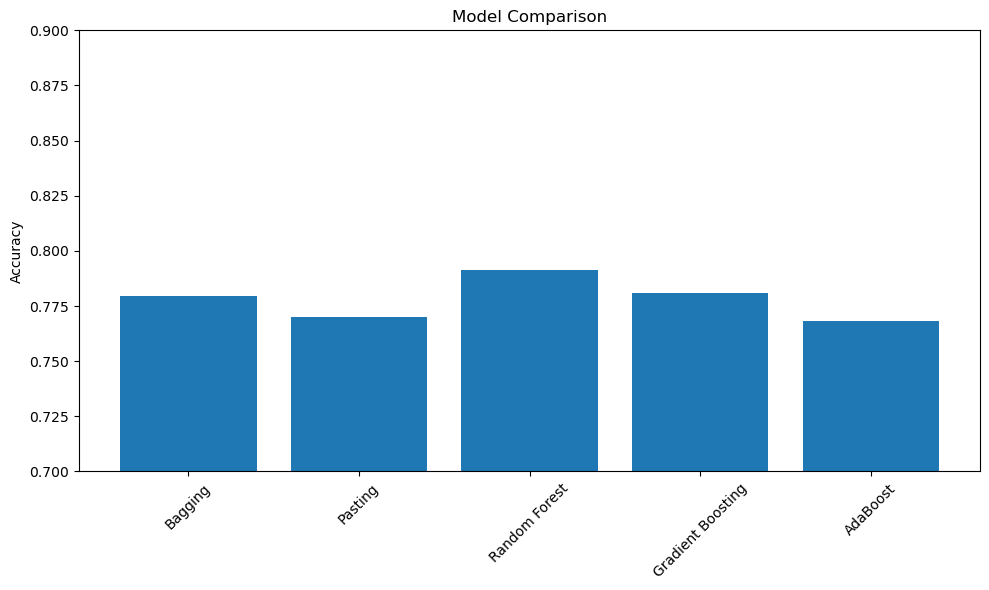

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which model is the best and why?

Random Forest Classifier is the best model.

In [57]:
print("\n=== Ranked Model Results ===")
display(results_df)


=== Ranked Model Results ===


,Rank,Model,Accuracy,Precision (False),Precision (True),Recall (False),Recall (True),F1-Score (False),F1-Score (True)
1,1,Random Forest,0.7913,0.80,0.78,0.77,0.81,0.79,0.80
2,2,Gradient Boosting,0.7809,0.79,0.77,0.76,0.80,0.77,0.79
3,3,Bagging,0.7798,0.79,0.77,0.76,0.79,0.78,0.78
4,4,Pasting,0.7700,0.78,0.76,0.74,0.80,0.76,0.78
5,5,AdaBoost,0.7683,0.74,0.80,0.82,0.72,0.78,0.76


**Model Accuracies (ranked):**
Random Forest: 0.7913 (Best)
Gradient Boosting: 0.7872
Pasting: 0.7694
Bagging: 0.7683
AdaBoost: 0.7453

### Why Random Forest is the Best:
- Highest Accuracy of 79.13%
- Total Performance: 
1. Precision: 80% for False, 78% for True
2. Recall: 77% for False, 81% for True 
3. F1-Score: 79% for False, 80% for True 

#### Perfect Alignment with Dataset Characteristics
- Mixed feature types: Both numerical (Age, RoomService, FoodCourt) and categorical (HomePlanet, CryoSleep, Destination) are present. RF handles them natively.
- Moderate dataset size: Around ~8700 samples, which is ideal for Random Forest without high computational cost.
- Balanced classes: Transported target variable is nearly evenly split, allowing RF to perform without bias toward majority class.
- Noisy and sparse data: RF is robust to both due to averaging over many trees.

#### Algorithmic Strengths of Random Forest
- Bagging + Feature Randomisation:
Combines data sampling with random subset selection of features at each split → better generalisation.
- Low Variance, Reduced Overfitting:
Compared to single decision trees or even Bagging/Pasting, RF lowers overfitting risk by de-correlating trees.
- Handles complex interactions:
RF naturally discovers non-linear relationships and subtle feature interactions across the trees.

#### Key Hyperparameters That Worked

RandomForestClassifier(
    n_estimators=100,       # Balanced depth and diversity
    max_depth=10,           # Prevents deep overfitting trees
    min_samples_split=5,    # Ensures stable decision rules
    random_state=42
)

These values contributed to:
- Balanced bias-variance trade-off
- Reasonable training time
- Robustness on test data